# Natural Language Processing

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The **"stars"** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The **"cool"** column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The **"useful"** and **"funny"** columns are similar to the "cool" column.

## Imports Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## The Data


In [97]:
yelp = pd.read_csv('yelp.csv')

In [98]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [99]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [106]:
row = yelp.shape[0]
col = yelp.shape[1]
print(f'There are \033[1m{row}\033[0m rows and \033[1m{col}\033[0m columns from this dataset')

There are 10000 rows and 10 columns from this dataset


**Descriptive Statistics for Numerical Variabel**

In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Descriptive Statistics for Categorical Variabel**

In [7]:
yelp.describe(include='O')

,business_id,date,review_id,text,type,user_id
count,10000,10000,10000,10000,10000,10000
unique,4174,1995,10000,9998,1,6403
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,Great service,review,fczQCSmaWF78toLEmb0Zsw
freq,37,21,1,2,10000,38


**Change data type of "date" column from object to datetime**

In [107]:
yelp['date'] = pd.to_datetime(yelp['date'])

**Add a new column called "text length" which is the number of words in the text column, and "year" which is the year of review.**

In [108]:
yelp['text_length'] = yelp['text'].apply(len)
yelp['year'] = yelp['date'].dt.year

In [109]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,year
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,2011
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,2011
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,2012
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,2010
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,2012


# EDA

Let's explore the data

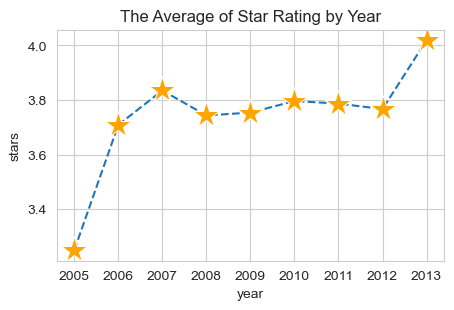

In [110]:
plt.figure(figsize=(5,3))
sns.lineplot(data=yelp, x='year', y='stars', marker='*', markerfacecolor='orange', ls='--', markersize=20, ci=None)
plt.title('The Average of Star Rating by Year');

<Figure size 800x400 with 0 Axes>

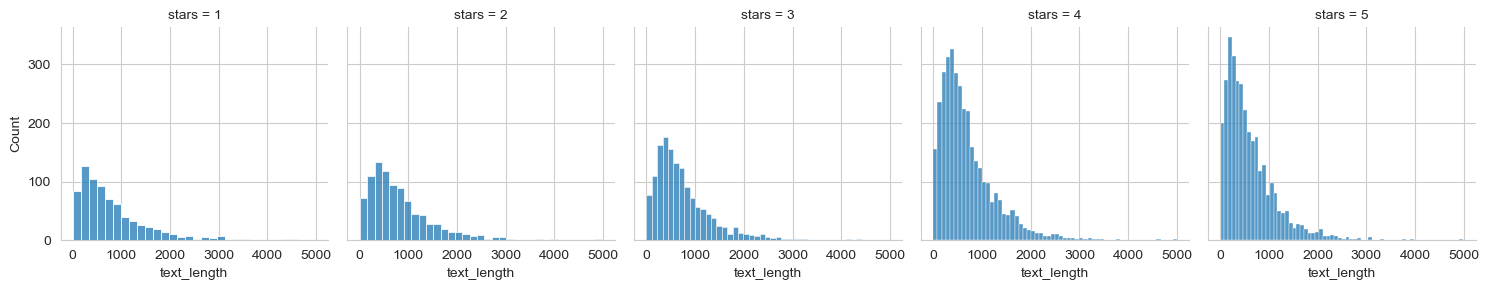

In [111]:
plt.figure(figsize=(8,4))
g = sns.FacetGrid(yelp, col="stars")
g.map_dataframe(sns.histplot, x="text_length");

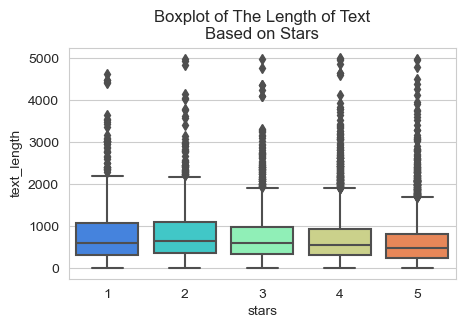

In [112]:
plt.figure(figsize=(5,3))
sns.boxplot(data=yelp, x='stars', y='text_length', palette='rainbow')
plt.title('Boxplot of The Length of Text\nBased on Stars');

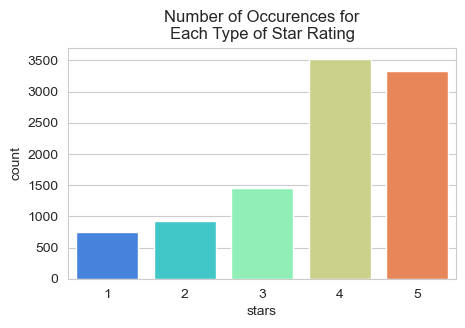

In [113]:
plt.figure(figsize=(5,3))
sns.countplot(yelp, x='stars',palette='rainbow')
plt.title('Number of Occurences for\nEach Type of Star Rating');

In [116]:
num_var = yelp.select_dtypes(include=['float', 'int']).drop('year',axis=1)

In [117]:
stars = num_var.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [120]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

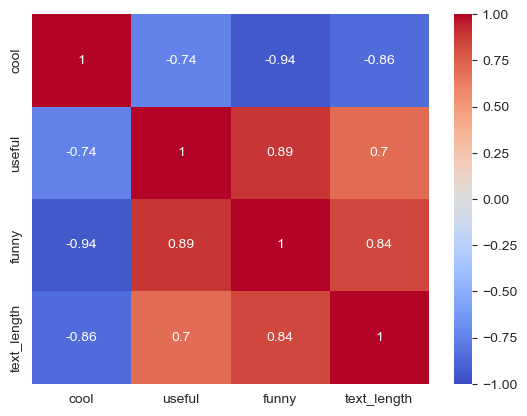

In [121]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True, vmin=-1);

## NLP Classification Task


**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [124]:
yelp_class = yelp[(yelp['stars']==1)|(yelp['stars']==5)][['text','stars']]
yelp_class.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
6,Drop what you're doing and drive here. After I...,5


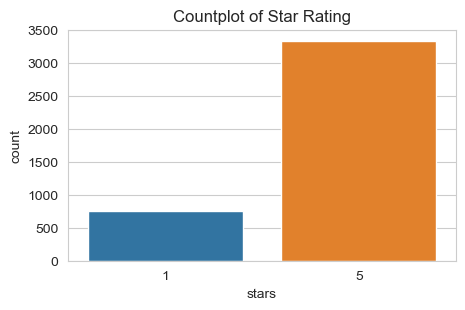

In [130]:
plt.figure(figsize=(5,3))
sns.countplot(data=yelp_class, x='stars')
plt.title('Countplot of Star Rating');

**Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [157]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [162]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.


In [164]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

**Import MultinomialNB and create an instance of the estimator and call is nb**

In [167]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [173]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [174]:
predictions = nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test**

In [170]:
from sklearn.metrics import classification_report, confusion_matrix

In [175]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



The model has accuracy in predicting reaching 93%. This is already very good at predicting.

**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing


In [183]:
import string
from nltk.corpus import stopwords

In [184]:
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    '''
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**import TfidfTransformer and pipeline from sklearn.**

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

**Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [185]:
pipeline = Pipeline ([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [186]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [187]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020A4E128E00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [188]:
pipe_predict = pipeline.predict(X_test)

In [189]:
print(confusion_matrix(y_test, pipe_predict))
print('\n')
print(classification_report(y_test, pipe_predict))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



**Looks like Tf-Idf actually made things worse! So it's better to use the previous model.**

# Thank You!